In [ ]:
# colab에서 실행

In [ ]:
import numpy as np                  # numpy 라이브러리 불러오기
import cv2                          # OpenCV 라이브러리 불러오기
from google.colab.patches import cv2_imshow

In [ ]:
## opencv에 있는 정면이미지 분류 클래스 이용해서 이미지에서 얼굴찾아보자.
face_cascade = cv2.CascadeClassifier(
       cv2.data.haarcascades +
       'haarcascade_frontalface_default.xml'
   )

In [ ]:
# file_name = "/content/drive/MyDrive/0-ㄱ-CODEIT(2025)/deep/img/face.png"
file_name = "/content/drive/MyDrive/0-ㄱ-CODEIT(2025)/deep/img/face2.jpg"

344 51 25 25
412 86 28 28
358 120 29 29
106 132 27 27


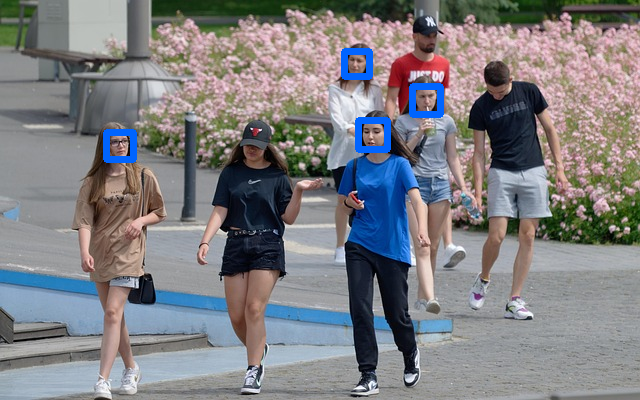

In [ ]:
#1. file_name에 지정된 파일을 읽어오자.
ff = np.fromfile(file_name, np.uint8)
# ff
#2. 이미지로 인식시켜주기 위해 opencv로 이미지로 인식시켜 읽어오자.
img = cv2.imdecode(ff, cv2.IMREAD_UNCHANGED)
# img
#3. 칼라버리고 흑백으로 변환하자.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray
#4. 얼굴인식하여 찾아라.--> 여러개의 얼굴리스트(위치값)
faces = face_cascade.detectMultiScale(gray, 1.2, 5)
faces

#5. 여러개의 얼굴에서 위치를 꺼내주자.(반복문 이용)
for (x, y, w, h) in faces:
  print(x, y, w, h)
  cv2.rectangle(img, (x, y), (x+w, y+h), (255, 100, 0), 5)

#6. 위치꺼내온 정보로 네모를 그려주자.
cv2_imshow(img)

In [ ]:
#!pip install gtts

In [ ]:
import IPython
from gtts import gTTS
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/0-ㄱ-CODEIT(2025)/deep/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
text = '안녕하세요 나는 서예진입니다. 지금 기말고사 중입니다.'
tts = gTTS(text = text, lang = 'ko') #slow=True (다소 또박또박)
tts.save(path + 'tts.mp3')
IPython.display.Audio(path + 'tts.mp3')


In [43]:
# !pip -q install edge-tts

In [55]:
import edge_tts #ms
import IPython

text = "안녕하세요. 저는 예진이입니다.! 배가 고픕니다."
# voice = "ko-KR-SunHiNeural"   # 예: 여성 음성,  "ko-KR-InJoonNeural", # 남성(환경에 따라 이름이 다를 수 있음)
voice = "ko-KR-SunHiNeural"
out = path + "tts_edge.mp3"
communicate = edge_tts.Communicate(text, voice)
await communicate.save(out)

IPython.display.Audio(out)

In [58]:
# !pip install faster-whisper


In [60]:
from faster_whisper import WhisperModel

In [61]:
audio_path =  path + "tts_edge.mp3"  # 변환할 음성 파일 경로

# CPU로도 가능. GPU 있으면 device="cuda"로
model = WhisperModel("small", device="cpu", compute_type="int8")

segments, info = model.transcribe(audio_path, language="ko")

print("감지 언어:", info.language)
print("==== 결과 ====")
for seg in segments:
    print(seg.text)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer.json: 0.00B [00:00, ?B/s]

vocabulary.txt: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.bin:   0%|          | 0.00/484M [00:00<?, ?B/s]

감지 언어: ko
==== 결과 ====
 안녕하세요. 저는 예진이입니다. 배가 고픕니다.


In [66]:

# !pip -q install googletrans==4.0.0-rc1 httpx==0.13.3 httpcore==0.9.1 h11==0.9.0

In [64]:
import googletrans
from googletrans import Translator

trans = Translator()
print(googletrans.__version__)

4.0.0-rc.1


In [65]:

str1 = '행복하세요'
result1 = trans.translate(str1, dest = 'en', src = 'ko')
print(result1.text)

be happy


In [67]:
str2 = 'I am happy'
result2 = trans.translate(str2, dest = 'ko', src = 'en')
print(result2.text)


나는 행복하다
